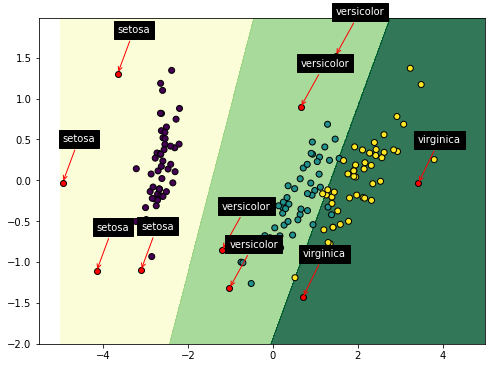

Accuracy: 0.966666666667


In [15]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Get data.
iris_bunch = datasets.load_iris()
data = iris_bunch.data
labels = iris_bunch.target
label_names = iris_bunch.target_names

# Perform PCA (Principal Component Analysis).
reduced_data = PCA(2).fit_transform(data)

# Create support vector classifier.
svc = svm.SVC(kernel='linear').fit(reduced_data, labels)

# Create contours.
xx, yy = np.meshgrid(np.arange(-5, 5, 0.01),
                     np.arange(-2, 2, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.YlGn, alpha=0.8)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels.astype(np.float), edgecolor='k')

ax = plt.gca()

# Amount of predictions to make.
pred_count = 10

for i in range(0, pred_count): 
    # Get random place to predict.
    x = 5 * np.random.rand() * np.random.choice([-1, 1])
    y = 2 * np.random.rand() * np.random.choice([-1, 1])
    
    # Predict and get label.
    res = svc.predict(np.c_[x, y])
    predicted_label = label_names[res[0]]
    
    # Annotate prediction label.
    ax.annotate(predicted_label, xy=(x, y), color='white', backgroundcolor='black', xytext=(x, y + 0.5), 
            arrowprops=dict(color='red', arrowstyle="->", connectionstyle="arc3"))
    
    # Plot point.
    plt.scatter(x, y, c='r', edgecolor='k')
       
# Show plot.
plt.show()

# Calculate accuracy.
print("Accuracy:", svc.score(reduced_data, labels))

